# IND320 — Project work Part 1: Dashboard basics
This notebook reads `open-meteo-subset.csv`, shows data, and produces a set of plots used as the basis for the Streamlit dashboard.

### Importing necessary libraries

In [9]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
plt.rcParams['figure.figsize'] = (10, 4)

### Loading the csv data

In [2]:

csv_path = "../data/open-meteo-subset.csv"
try:
    # Try with first column as index and parse dates
    df = pd.read_csv(csv_path, index_col=0, parse_dates=True)
except Exception:
    df = pd.read_csv(csv_path)
if df.index.name is None:
    df.index.name = 'index'

print("Loaded CSV shape:", df.shape)
display(df.head())


Loaded CSV shape: (8760, 5)


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


### Basic summary of the data

In [3]:
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)

print("\nDescriptive statistics:")
display(df.describe())

print("\nFirst 10 rows:")
display(df.head(10))

Columns: ['temperature_2m (°C)', 'precipitation (mm)', 'wind_speed_10m (m/s)', 'wind_gusts_10m (m/s)', 'wind_direction_10m (°)']

Data types:


temperature_2m (°C)       float64
precipitation (mm)        float64
wind_speed_10m (m/s)      float64
wind_gusts_10m (m/s)      float64
wind_direction_10m (°)      int64
dtype: object


Descriptive statistics:


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000



First 10 rows:


,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
time,,,,,
2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284
2020-01-01 05:00:00,-2.8,0.0,10.3,22.6,286
2020-01-01 06:00:00,-2.8,0.0,9.6,21.8,286
2020-01-01 07:00:00,-2.9,0.0,9.7,20.7,284
2020-01-01 08:00:00,-2.8,0.0,9.4,20.5,284


### Plotting each column separately

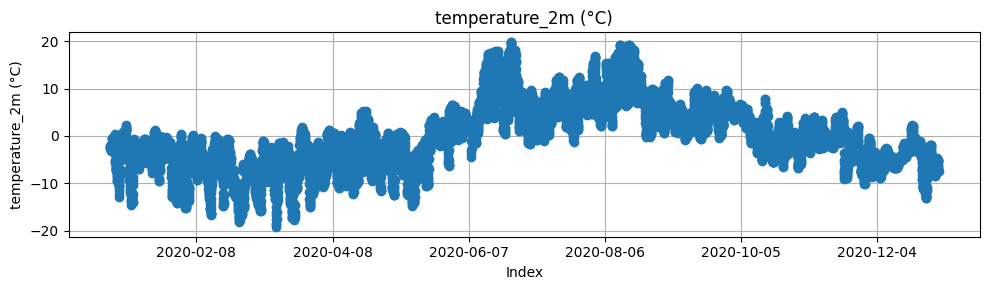

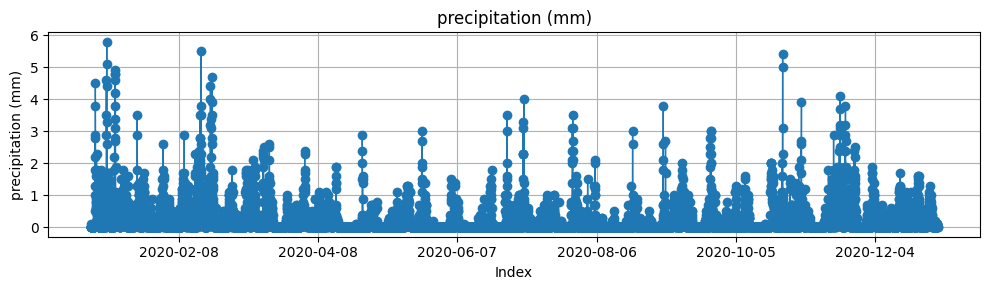

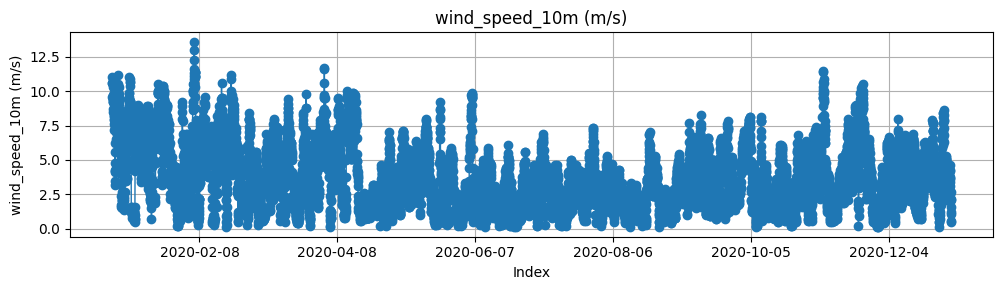

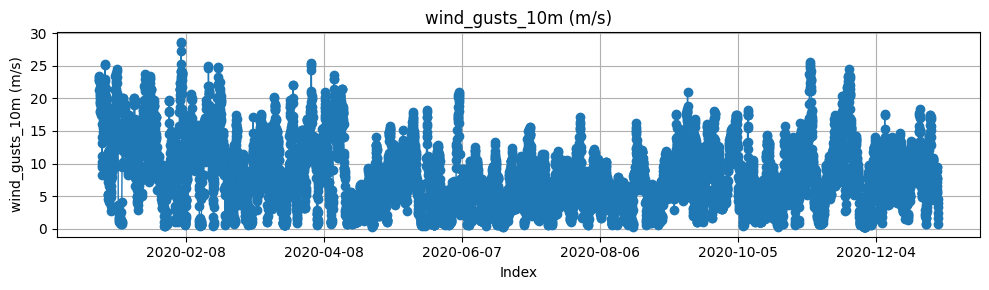

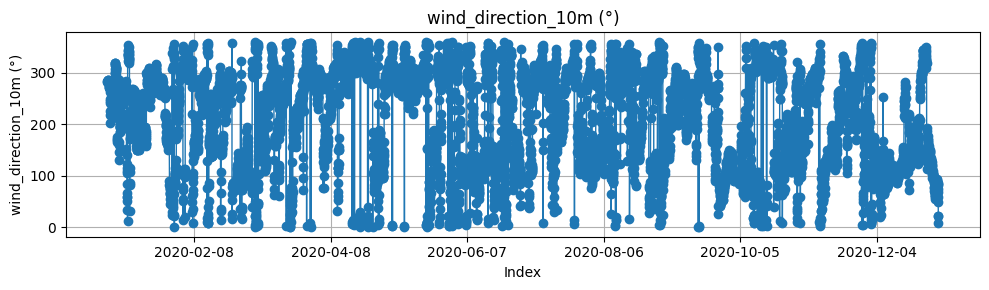

In [4]:
# Plot each column in its own subplot for clarity
n = len(df.columns)
for i, col in enumerate(df.columns):
    plt.figure(figsize=(10,3))
    # If series is numeric, plot. If not numeric, try to convert or skip.
    try:
        series = pd.to_numeric(df[col], errors='coerce')
        plt.plot(df.index, series, marker='o', linewidth=1)
        plt.title(f"{col}")
        plt.xlabel("Index")
        plt.ylabel(col)
        plt.grid(True)
        plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=8))
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not plot column {col}: {e}")

### Plotting all columns together

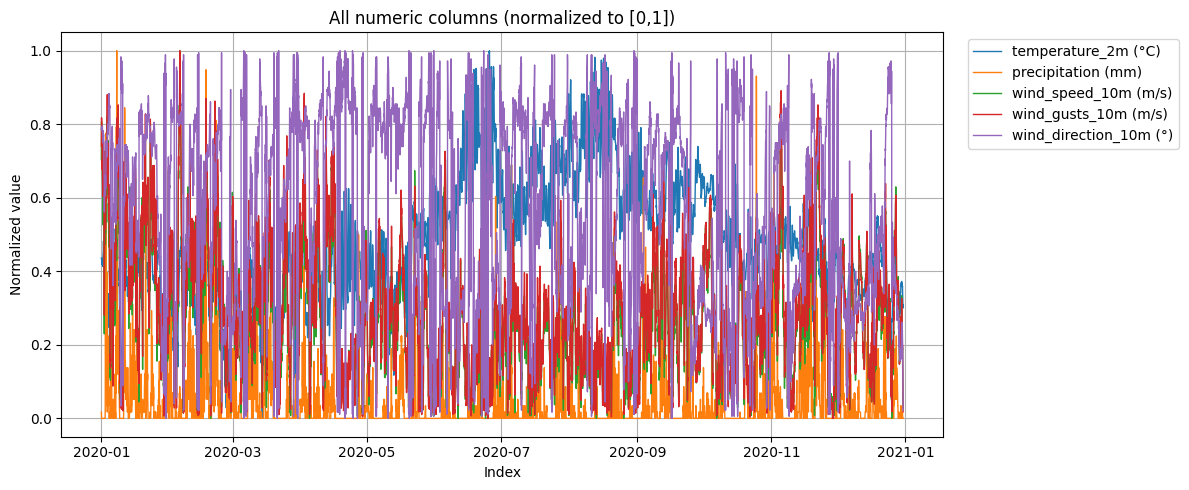

In [5]:
# Normalize each column to [0,1] to show all on the same axis

df_num = df.select_dtypes(include=[np.number]).copy()
if df_num.shape[1] == 0:
    print("No numeric columns detected to plot together.")
else:
    df_norm = (df_num - df_num.min()) / (df_num.max() - df_num.min())
    plt.figure(figsize=(12,5))
    for col in df_norm.columns:
        plt.plot(df_norm.index, df_norm[col], label=col, linewidth=1)
    plt.title("All numeric columns (normalized to [0,1])")
    plt.xlabel("Index")
    plt.ylabel("Normalized value")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
# List all numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Dropdowns for selecting two variables
col1_dropdown = widgets.Dropdown(options=numeric_columns, description='Left Y-axis:')
col2_dropdown = widgets.Dropdown(options=numeric_columns, description='Right Y-axis:')

def plot_dual_axis(col1, col2):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    ax1.plot(df.index, df[col1], 'b-', label=col1)
    ax1.set_xlabel('Index')
    ax1.set_ylabel(col1, color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(df.index, df[col2], 'g-', label=col2)
    ax2.set_ylabel(col2, color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f"Dual-axis Plot: {col1} vs {col2}")
    fig.tight_layout()
    plt.show()

widgets.interact(plot_dual_axis, col1=col1_dropdown, col2=col2_dropdown)

interactive(children=(Dropdown(description='Left Y-axis:', options=('temperature_2m (°C)', 'precipitation (mm)…

<function __main__.plot_dual_axis(col1, col2)>

### How all columns are plotted together

- When columns have different scales, normalization or secondary axes are common solutions.
- Normalization makes relative patterns visible.
- Secondary-axis plotting is useful when comparing two variables with different units.

### link to Streamlit & GitHub placeholders

- Streamlit app (after deployment): https://weatherinsights.streamlit.app/
- GitHub repository: https://github.com/Srivatsav1298/WeatherInsights